<b><b><center><font size = 4.5>Topic: Bank Marketing: Predicting if a client will subscribe to a term deposit for a Portuguese banking institution</font></center></b>



The data used for this project was extracted from Kaggle found through the following link:
https://www.kaggle.com/datasets/yufengsui/portuguese-bank-marketing-data-set

In [1]:
#Enabling multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Importing the relevant libraries and packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from keras_sequential_ascii import keras2ascii
from keras.layers import SimpleRNN
from keras.preprocessing import sequence
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Table of Contents

* [1. Introduction](#Introduction_to_dataset)
* [2. Data](#Data)
    * [2.1 Dataset Description and Overview](#Dataset_Description_and_Overview)
* [3. Explorations and Visualisations](#Exploration_and_Visualisations)
    * [3.1 Visual for outcome variable](#Visual_for_outcome_variable)
    * [3.2 Visual for clients job and if they subscribe to a term deposit](#Visual_for_clients_job_and_if_they_subscribe_to_a_term_deposit)
    * [3.3 Visual showing if the client has a housing loan and if they subscribe to the term deposit](#Visual_showing_if_the_client_has_a_housing_loan_and_if_they_subscribe_to_the_term_deposit)
    * [3.4 Visual showing if the client has a personal loan and if they subscribe to the term deposit](#Visual_showing_if_the_client_has_a_personal_loan_and_if_they_subscribe_to_the_term_deposit)  
    * [3.5 Age distribution of clients](#Age_distribution_of_clients)   
    * [3.6 Correlation matrix](#Correlation_matrix)  
* [4. Data splitting to train and test set](#Data_splitting_to_train_and_test_set)
* [5. Data pre-processing](#Data_pre-processing)
    * [5.1 Encoding object variables](#Encoding_object_variables)
    * [5.2 Fixing the class imbalance issue](#Fixing_the_class_imbalance_issue) 
    * [5.3 Data Normalization](#Data_Normalization)
    * [5.4 Conducting Principal Component Analysis to reduce dimensionality](#Conducting_Principal_Component_Analysis_to_reduce_dimensionality)
* [6. Basic Model Building](#Basic_Model_Building)
    * [6.1 Model 1](#Model_1)
    * [6.2 Model 2](#Model_2)
    * [6.3 Model 3](#Model_3)
* [7. Model Fine-tuning](#Model_Fine-tuning)
    * [7.1 Model 1 Fine-tuning](#Model_1_Fine-tuning)
    * [7.2 Model 3 Fine-tuning](#Model_3_Fine-tuning)
* [8. Model evaluation](#Model_evaluation)
* [9. Conclusion](#Conclusion)
* [10. Bibliography](#Bibliography)







# Introduction <a class="anchor" id="Introduction"></a>

Deep neural networks emerged from an area of research in neuroscience and computer science and has since evolved and applied in areas such as computer vision, Natural Language Processing, autonomous systems, healthcare and many more (Hardesty, 2017).  

The project aims to use a multilayer perceptron neural network that connects multiple layers. Every node has a non-linear activation function, apart from the input nodes. It uses backpropagation as a supervised learning technique i.e., after each forward pass in a network, backpropagation does a backwards pass while adjusting the weights and biases (Kostadinov, 2019). 

We use the bank marketing dataset from the UCI Machine learning repository originally sourced from a paper titled “A data-driven approach to predict the success of bank telemarketing” (UCI Machine Learning Repository, 2012), (Moro, Cortez and Rita, 2014). The data is a classification task and relates to a direct marketing campaign of a Portuguese banking institution and the goal is to predict if a client will subscribe to a term deposit. A term deposit/ fixed deposit is a type of investment at a bank that is agreed at a rate of interest for a fixed period. The interest rates are better than a savings account, and banks encourage clients to have a term deposit to get more money into the banks cycle. The marketing strategy is a method to encourage more customers to join the scheme, thus building a predictive model to assess which clients will portray likeliness of joining the scheme. 


# Data <a class="anchor" id="Data"></a>

## Dataset Description and Overview <a class="anchor" id="Dataset_Description_and_Overview"></a>

The dataset is fairly clean and comprises of 45,211 rows and 17 columns with no duplicated or null values. There are 10 variables comprising of the “object” datatypes that would later be encoded into numerical attributes to implement the neural network. From the summary statistics, the mean age of clients is 40 years and the average balance in their bank accounts is EUR 1,362.  

In [3]:
#Importing the dataset:
bank_data = pd.read_csv('bank.csv', sep=";")

In [4]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
#Checking the shape of the dataset
num_rows = bank_data.shape[0]
num_cols = bank_data.shape[1]

#Print the results
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 45211
Number of columns: 17


In [6]:
#Check whether the dataset has any duplicates
bank_data.duplicated().sum()
#There are no duplicates in the dataset

0

In [7]:
#Checking for missing values
print(bank_data.isnull().sum())
#There are no missing values in the dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Table to explain the meaning of each column
names_var = list(bank_data.columns)
names_explain = ["Age of the client", 
                 "Clients or customers job e.g., housemaid, services, technician",
                 "Marital status",
                 "Clients education level",
                 "Does the client have credit in default - Yes or No",
                 "Customers bank account balance",
                 "Does the client have a housing loan - Yes or No",
                 "Does the client have a personal loan - Yes or No",
                 "Contact communication type e.g., telephone, cellular",
                 "Last contact day of the week e.g., Monday, Tuesday",
                 "Last month contacted of the year e.g., Jan, Feb",
                 "Last contact duration in seconds",
                 "Number of contacts performed during this campaign and for this client",
                 "Number of days that passed by after the client was last contacted from a previous campaign",
                 "Number of contacts performed for a client before the campaign",
                 "Outcome of the previous marketing campaign - Failure, Non-existent, Success",
                 "Has the client subscribed a term deposit - Yes or No",]
var_explanation = pd.DataFrame({"Variable Name":names_var,
                                "Variable Explanation":names_explain})
var_explanation

,Variable Name,Variable Explanation
0,age,Age of the client
1,job,"Clients or customers job e.g., housemaid, serv..."
2,marital,Marital status
3,education,Clients education level
4,default,Does the client have credit in default - Yes o...
5,balance,Customers bank account balance
6,housing,Does the client have a housing loan - Yes or No
7,loan,Does the client have a personal loan - Yes or No
8,contact,"Contact communication type e.g., telephone, ce..."
9,day,"Last contact day of the week e.g., Monday, Tue..."


In [9]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
# With many "object" variables, we assess the categories that exist in these variables:
bank_data["job"].value_counts()
bank_data["marital"].value_counts()
bank_data["education"].value_counts()
bank_data["default"].value_counts()
bank_data["housing"].value_counts()
bank_data["loan"].value_counts()
bank_data["contact"].value_counts()
bank_data["month"].value_counts()
bank_data["poutcome"].value_counts()
bank_data["y"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

no     39922
yes     5289
Name: y, dtype: int64

In [11]:
sum_stats = bank_data.describe()
sum_stats

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
#Counting the number of observations in the "y" variable
counts = bank_data["y"].value_counts()

# Printing the counts
print("Number of observations with y=0:", counts[0])
print("Number of observations with y=1:", counts[1])


Number of observations with y=0: 39922
Number of observations with y=1: 5289


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

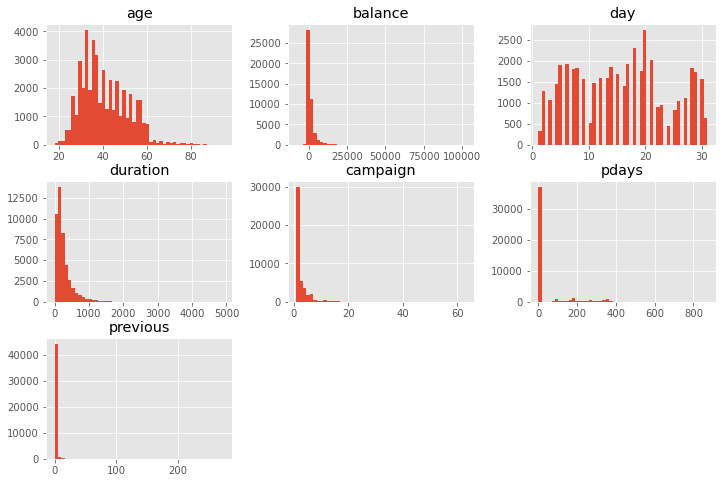

In [13]:
#Quick visual of attributes in the dataset:
bank_data.hist(bins=50, figsize=(12, 8))
plt.show()


# Exploration and Visualisations <a class="anchor" id="Exploration_and_Visualisations"></a>

### Visual for outcome variable <a class="anchor" id="Visual_for_outcome_variable"></a>

From the plot, it is evident there is a class imbalance i.e., the distribution isn't equal across the "Yes" and "No" categories. This indicates that majority of the clients in the dataset haven't subscribed for a term deposit. The imbalance could result in the model being biased towards the "No" class, resulting in poor prediction accuracy for the minority class.  

To rectify the imbalance issue, we would use SMOTE which is an algorithm that performs data augmentation by creating synthetic data points based on the minority class of the original data i.e., "Yes". SMOTE doesn't create duplicates but creates slightly different data points from the original data (Korstanje, 2021). We would have a more balanced dataset to train the neural network that doesn't have bias towards the majority class. 

SMOTE will be conducted in the data pre-processing steps below. 

<Figure size 360x360 with 0 Axes>

<AxesSubplot:xlabel='y', ylabel='count'>

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Categories')

<AxesSubplot:xlabel='y', ylabel='count'>

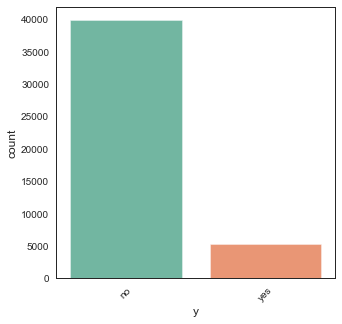

In [14]:
#Changing the colour palette of plots
my_palette = sns.color_palette("Set2")
sns.set_palette(my_palette)
#Setting figure size
plt.figure(figsize=(5, 5))
sns.set_style("white")

#Plot
sns.countplot(x='y', data=bank_data)
plt.xticks(rotation=45)

plt.ylabel('Count')
plt.xlabel('Categories')
sns.countplot(x='y', data=bank_data)

### Visual for clients job and if they subscribe to a term deposit <a class="anchor" id="Visual_for_clients_job_and_if_they_subscribe_to_a_term_deposit"></a>

The graph displays that individuals who are technicians, in management, or have a blue-collar job (manual labour) are more likely to subscribe for the term deposit. 

<AxesSubplot:xlabel='job'>

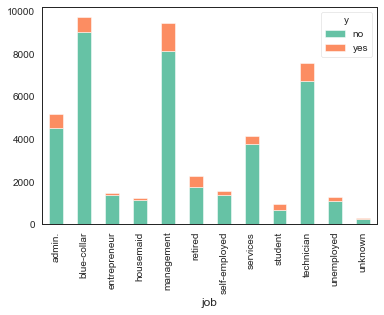

In [15]:
#Analysing the job variable vs. the target variable 'y'
bank_data.groupby(['job','y']).job.count().unstack().plot.bar(stacked=True)

### Visual showing if the client has a housing loan and if they subscribe to the term deposit <a class="anchor" id="Visual_showing_if_the_client_has_a_housing_loan_and_if_they_subscribe_to_the_term_deposit"></a>

The plot displays that clients who don't have housing loans with the bank are more likely to subscribe for the term deposit.

<AxesSubplot:xlabel='housing'>

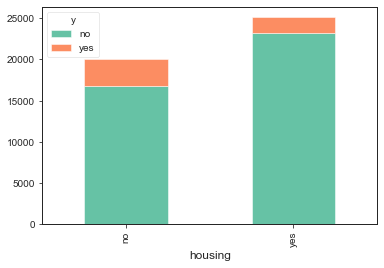

In [16]:
#Creating a contingency table of "housing" and "y"
housing_y_counts = pd.crosstab(bank_data['housing'], bank_data['y'])

#Creating a stacked bar chart of "housing" and "y"
sns.set_style("whitegrid")
sns.set_style("ticks") 
housing_y_counts.plot(kind='bar', stacked=True)


### Visual showing if the client has a personal loan and if they subscribe to the term deposit <a class="anchor" id="Visual_showing_if_the_client_has_a_personal_loan_and_if_they_subscribe_to_the_term_deposit"></a>

There are a majority of individuals that don't have a personal loan with the bank and they are more likely to subscribe for the term deposit. 

<AxesSubplot:xlabel='loan'>

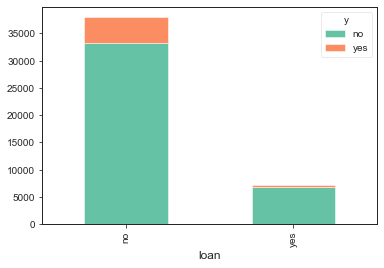

In [17]:
#Creating a contingency table of "housing" and "y"
housing_y_counts = pd.crosstab(bank_data['loan'], bank_data['y'])

#Creating a stacked bar chart of "housing" and "y"
sns.set_style("whitegrid")
sns.set_style("ticks") 
housing_y_counts.plot(kind='bar', stacked=True)

### Age distribution of clients <a class="anchor" id="Age_distribution_of_clients"></a>

Majority of the clients are aged between 30 - 40 years

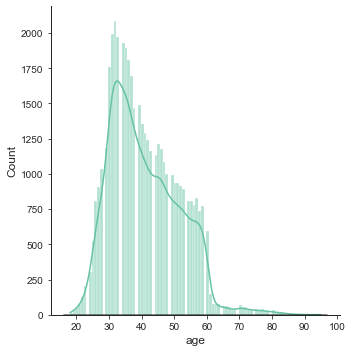

In [18]:
#Creating a distribution plot of the "age" variable with a trend line
age_distribution = sns.displot(bank_data['age'], kde=True)
age_distribution.map(sns.kdeplot, 'age', bw_adjust=0.5, clip_on=False, color='black', alpha=0.5)

### Correlation matrix <a class="anchor" id="Correlation_matrix"></a>

There are possible multicollinearity issues between "previous" and "pdays". 

<AxesSubplot:>

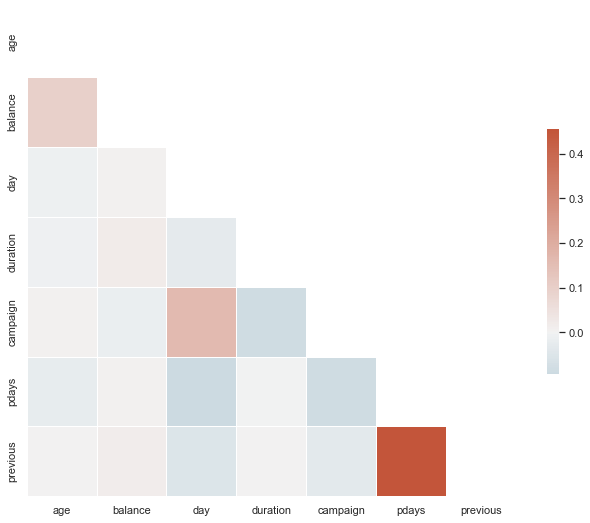

In [19]:
#Creating the correlation matrix
corr_matrix = bank_data.corr()

#Creating a heatmap of the correlation matrix
sns.set(style='white')
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})



# Data splitting to train and test set <a class="anchor" id="Data_splitting_to_train_and_test_set"></a>

In [20]:
#Split between X and Y (target variable)
Y = bank_data["y"]
X = bank_data.drop("y", axis = 1)

In [21]:
#Data Partitioning: 70% train set and 30% test set (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42,  stratify=Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(31647, 16) (13564, 16) (31647,) (13564,)


In [22]:
#Creating a copy of the training set
bank = X_train.copy()

In [23]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13382,31,services,married,secondary,no,1,yes,no,cellular,9,jul,82,1,-1,0,unknown
32641,35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,unknown
3991,24,blue-collar,single,secondary,no,77,yes,no,unknown,16,may,236,2,-1,0,unknown
8068,35,blue-collar,married,secondary,no,80,yes,yes,unknown,2,jun,579,2,-1,0,unknown
27484,37,services,single,secondary,no,105,no,yes,cellular,21,nov,197,2,157,4,failure


In [24]:
X_train.isnull().sum()
X_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Data pre-processing <a class="anchor" id="Data_pre-processing"></a>

### Encoding object variables <a class="anchor" id="Encoding_object_variables"></a>

Encoding will be done on the training set then propagated to the testing set. It's doen after splitting the data to avoid data leakages that could result in over-optimistic performance estimates. The following were applied:

 - Label encoding: "default", "housing", "loan", "y"
 - One-hot encoding: "job", "marital", "contact", "month", "poutcome"
 - Ordinal encoding: "education"

#### Label Encoding

In [25]:
#Creating a label encoder variable
le = LabelEncoder()

#Creating a copy is error is encountered
X_train_encoded = X_train.copy()

#Fitting the encoder to variables and then propagating to testing set
X_train_encoded["default"] = le.fit_transform(X_train_encoded["default"])
X_test["default"] = le.transform(X_test["default"])

X_train_encoded["housing"] = le.fit_transform(X_train_encoded["housing"])
X_test["housing"] = le.transform(X_test["housing"])

X_train_encoded["loan"] = le.fit_transform(X_train_encoded["loan"])
X_test["loan"] = le.transform(X_test["loan"])

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

#### One-hot encoding

In [26]:
#Columns to be encoded
cols_to_encode = ["job", "marital", "contact", "month", "poutcome"]

#Using get_dummies function to encode
X_train_encoded = pd.get_dummies(X_train_encoded, columns=cols_to_encode)
X_test = pd.get_dummies(X_test, columns=cols_to_encode)

#Making sure X_train_encoded and X_test columns are identical after encoding
missing_cols = set(X_train_encoded.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train_encoded.columns]


#### Ordinal encoding

In [27]:
# create an instance of the OrdinalEncoder() function
ordinal_encoder = OrdinalEncoder()

# fit the encoder to the education column and transform it for both train and test sets
X_train_encoded["education"] = ordinal_encoder.fit_transform(X_train_encoded[["education"]])
X_test["education"] = ordinal_encoder.transform(X_test[["education"]])


### Fixing the class imbalance issue <a class="anchor" id="Fixing_the_class_imbalance_issue"></a>

In [28]:
#Applying SMOTE on the training set
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train_encoded, y_train)

#Shape of the new training set after SMOTE
print(X_train_sm.shape, y_train_sm.shape)

#We now use use X_train_sm and y_train_sm for further steps

(55890, 45) (55890,)


### Data Normalization <a class="anchor" id="Data_Normalization"></a>

Normalization ensures the data has a similar scale and distribution in order to improve the performance and convergence of the DNN. 

Below we assess what variables need to be encoded:

In [29]:
#Calculating the minimum and maximum of each value
min_vals = X_train_sm.min()
max_vals = X_train_sm.max()

#Calculating the range of each feature
range_vals = max_vals - min_vals

#Print
print("Range of each feature:\n", range_vals)


Range of each feature:
 age                      77.0
education                 3.0
default                   1.0
balance              110146.0
housing                   1.0
loan                      1.0
day                      30.0
duration               4918.0
campaign                 62.0
pdays                   872.0
previous                275.0
job_admin.                1.0
job_blue-collar           1.0
job_entrepreneur          1.0
job_housemaid             1.0
job_management            1.0
job_retired               1.0
job_self-employed         1.0
job_services              1.0
job_student               1.0
job_technician            1.0
job_unemployed            1.0
job_unknown               1.0
marital_divorced          1.0
marital_married           1.0
marital_single            1.0
contact_cellular          1.0
contact_telephone         1.0
contact_unknown           1.0
month_apr                 1.0
month_aug                 1.0
month_dec                 1.0
month_feb       

**Since most values are binary, they don't need to be normalized as this doesn't impact model performance gravely.**

For other features, we check the distribution and outliers to assess what methods to use using a histogram and box plots. 

(array([ 1836., 14695., 16302.,  9817.,  7970.,  3788.,   843.,   471.,
          151.,    17.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Age')

(array([4.7543e+04, 7.8690e+03, 3.1900e+02, 9.9000e+01, 2.3000e+01,
        1.9000e+01, 6.0000e+00, 5.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Balance')

(array([2950., 6070., 6639., 5949., 7308., 7095., 7377., 3695., 3705.,
        5102.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Day')

(array([4.1370e+04, 1.0582e+04, 3.1280e+03, 6.2900e+02, 8.6000e+01,
        5.5000e+01, 3.3000e+01, 6.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Duration')

(array([5.3952e+04, 1.3880e+03, 3.3000e+02, 1.3100e+02, 5.6000e+01,
        2.1000e+01, 6.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Campaign')

(array([4.3283e+04, 4.8340e+03, 3.8290e+03, 2.0620e+03, 1.4380e+03,
        2.9300e+02, 6.7000e+01, 2.8000e+01, 2.4000e+01, 3.2000e+01]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Pdays')

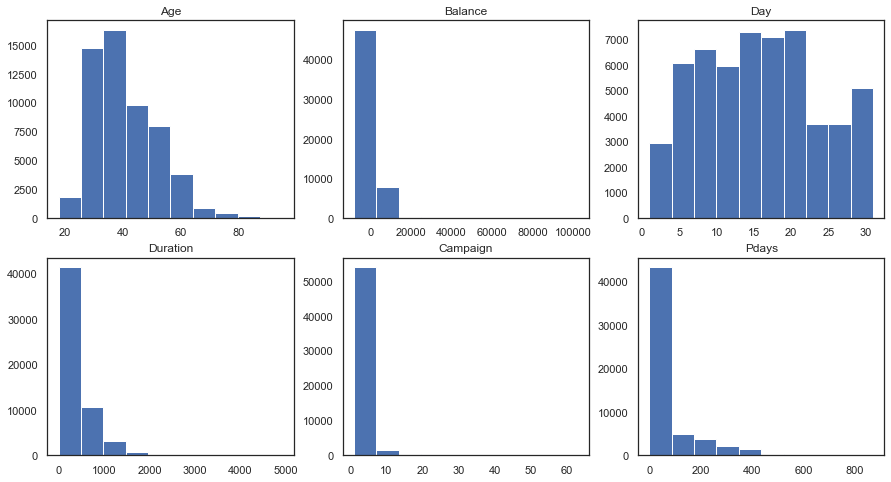

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

axs[0, 0].hist(X_train_sm["age"])
axs[0, 0].set_title("Age")
axs[0, 1].hist(X_train_sm["balance"])
axs[0, 1].set_title("Balance")
axs[0, 2].hist(X_train_sm["day"])
axs[0, 2].set_title("Day")
axs[1, 0].hist(X_train_sm["duration"])
axs[1, 0].set_title("Duration")
axs[1, 1].hist(X_train_sm["campaign"])
axs[1, 1].set_title("Campaign")
axs[1, 2].hist(X_train_sm["pdays"])
axs[1, 2].set_title("Pdays")
plt.show()



{'whiskers': [<matplotlib.lines.Line2D at 0x2bd80362f10>,
 'caps': [<matplotlib.lines.Line2D at 0x2bd803734f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bd80362c40>],
 'medians': [<matplotlib.lines.Line2D at 0x2bd80373a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bd80373d60>],
 'means': []}

Text(0.5, 1.0, 'Day')

{'whiskers': [<matplotlib.lines.Line2D at 0x2bd8038a3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bd8038a9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bd8038a100>],
 'medians': [<matplotlib.lines.Line2D at 0x2bd8038af40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bd80394250>],
 'means': []}

Text(0.5, 1.0, 'Duration')

{'whiskers': [<matplotlib.lines.Line2D at 0x2bd80394850>,
 'caps': [<matplotlib.lines.Line2D at 0x2bd80394df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bd80394580>],
 'medians': [<matplotlib.lines.Line2D at 0x2bd803a13d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bd803a16a0>],
 'means': []}

Text(0.5, 1.0, 'Campaign')

{'whiskers': [<matplotlib.lines.Line2D at 0x2bd803a1ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bd803ab280>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bd803a19d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bd803ab820>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bd803abaf0>],
 'means': []}

Text(0.5, 1.0, 'Pdays')

{'whiskers': [<matplotlib.lines.Line2D at 0x2bd803abf40>,
 'caps': [<matplotlib.lines.Line2D at 0x2bd803bd520>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bd803abbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bd803bdac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bd803bdd90>],
 'means': []}

Text(0.5, 1.0, 'Previous')

{'whiskers': [<matplotlib.lines.Line2D at 0x2bd803cd3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bd803cd970>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bd803cd100>],
 'medians': [<matplotlib.lines.Line2D at 0x2bd803cdf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bd803d6220>],
 'means': []}

Text(0.5, 1.0, 'age')

{'whiskers': [<matplotlib.lines.Line2D at 0x2bd803d6820>,
 'caps': [<matplotlib.lines.Line2D at 0x2bd803d6dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bd803d6550>],
 'medians': [<matplotlib.lines.Line2D at 0x2bd803e43a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bd803e4670>],
 'means': []}

Text(0.5, 1.0, 'balance')

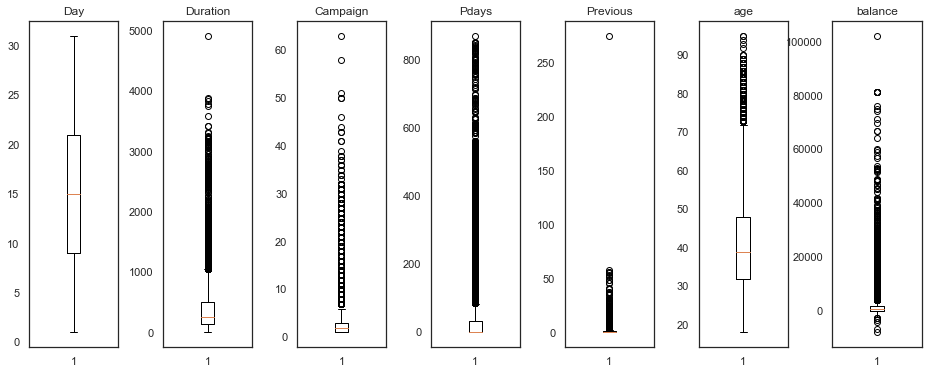

In [31]:
#Creating a figure with box plots
fig, axs = plt.subplots(nrows=1, ncols=7, figsize=(16, 6))

#Creating box plots for each variable
axs[0].boxplot(X_train_sm["day"])
axs[0].set_title("Day")
axs[1].boxplot(X_train_sm["duration"])
axs[1].set_title("Duration")
axs[2].boxplot(X_train_sm["campaign"])
axs[2].set_title("Campaign")
axs[3].boxplot(X_train_sm["pdays"])
axs[3].set_title("Pdays")
axs[4].boxplot(X_train_sm["previous"])
axs[4].set_title("Previous")
axs[5].boxplot(X_train_sm["age"])
axs[5].set_title("age")
axs[6].boxplot(X_train_sm["balance"])
axs[6].set_title("balance")

plt.subplots_adjust(wspace=0.5)
plt.show()


Given the results above, we will apply **RobustScaler for "duration", "campaign", "pdays", "previous", "age", "balance"**. The technique can handle variables that don't have a normal distribution and contain outliers.   

In [32]:
scaler = RobustScaler()

#Fit the scaler on the training data
scaler.fit(X_train_sm[['duration', 'campaign', 'pdays', 'previous', 'age', 'balance']])

#Transform the training and test sets
X_train_scaled = scaler.transform(X_train_sm[['duration', 'campaign', 'pdays', 'previous', 'age', 'balance']])
X_test_scaled = scaler.transform(X_test[['duration', 'campaign', 'pdays', 'previous', 'age', 'balance']])


RobustScaler()

### Conducting Principal Component Analysis to reduce dimensionality <a class="anchor" id="Conducting_Principal_Component_Analysis_to_reduce_dimensionality"></a>

PCA is a dimensionality-reduction method that transforms the number of variables in a dataset, while preserving as much information as possible. The smaller datatset is easier to explore and visualise and reduces the training time for machine learning algorithms (Jaadi, 2019). 

We apply it to the scaled training set and transform it to the test set.

In [33]:
# Create a PCA object with the desired number of components
pca = PCA(n_components=2)

# Fit the PCA model to the training data
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the same PCA object
X_test_pca = pca.transform(X_test_scaled)


Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Explained Variance Ratio')

Text(0.5, 1.0, 'Scree Plot')

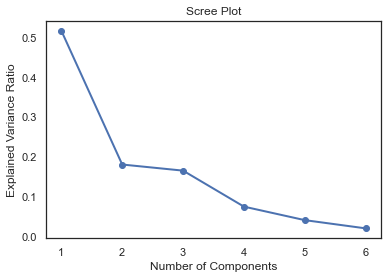

In [34]:
#Fitting PCA with all components
pca = PCA().fit(X_train_scaled)

#Plotting explained variance ratio for each component
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [35]:
#Checking the explained variance ratio
pca.explained_variance_ratio_

#51.7% of the dataset variance lies in the first PC, 18.1% in the second, 16.5% in the third, 
# 7.5% in the fifth, and 6.1% in the other PC's collectively.

array([0.51692801, 0.18083353, 0.16548731, 0.07510006, 0.0411531 ,
       0.02049799])

In [36]:
#Using n_components as 4

pca = PCA(n_components=4)

#Fitting the PCA model to the training data
X_train_pca = pca.fit_transform(X_train_scaled)

#Transforming the test data using the same PCA object
X_test_pca = pca.transform(X_test_scaled)


**Note:** After PCA, further feature selection doesn't need to be conducted.

# Basic Model Building <a class="anchor" id="Basic_Model_Building"></a>

## Model 1 <a class="anchor" id="Model_1"></a>

This is a two-layer MLP model using "Sequential" which is a linear stack of layers. 

Activation functions determine is a neuron need to be activated or not. It introduces non-linearity to an ANN and generates output from a collection of inputs (Marimuthu, 2022). We used ReLU and Sigmoid as activation functions for the hidden layers because of its computational efficiency, and it is easier to optimize. Sigmoid is the default activation function used for the output layer.

We used the Adam optimizer which is an extension of Stochastic Gradient Descent. It computes adaptive learning rates for each parameter based on estimates of the first and second moments of the gradients. It can handle noisy or sparse gradients, and converges faster (Brownlee, 2017).

Binary-cross entropy loss function is used as this is a classification problem. It penalizes models more heavily for making confident incorrect predictions (Roberts, 2023). 

In [37]:
#Creating the model

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Visualising the model and weights used
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           4
               Dense   XXXXX -------------------       160    82.9%
                relu   #####          32
               Dense   XXXXX -------------------        33    17.1%
             sigmoid   #####           1


In [39]:
#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train_pca, y_train_sm, epochs=20, batch_size=16, validation_data=(X_test_pca, y_test))

Epoch 1/20
3494/3494 [==============================] - 7s 2ms/step - loss: 0.6263 - accuracy: 0.6465 - val_loss: 0.6263 - val_accuracy: 0.6044
Epoch 2/20
3494/3494 [==============================] - 6s 2ms/step - loss: 0.6144 - accuracy: 0.6597 - val_loss: 0.6246 - val_accuracy: 0.6166
Epoch 3/20
3494/3494 [==============================] - 6s 2ms/step - loss: 0.6119 - accuracy: 0.6645 - val_loss: 0.6151 - val_accuracy: 0.6682
Epoch 4/20
3494/3494 [==============================] - 6s 2ms/step - loss: 0.6093 - accuracy: 0.6652 - val_loss: 0.6284 - val_accuracy: 0.6602
Epoch 5/20
3494/3494 [==============================] - 6s 2ms/step - loss: 0.6062 - accuracy: 0.6698 - val_loss: 0.6060 - val_accuracy: 0.6945
Epoch 6/20
3494/3494 [==============================] - 6s 2ms/step - loss: 0.6028 - accuracy: 0.6712 - val_loss: 0.6305 - val_accuracy: 0.6786
Epoch 7/20
3494/3494 [==============================] - 6s 2ms/step - loss: 0.5989 - accuracy: 0.6753 - val_loss: 0.5605 - val_accuracy:

<Figure size 432x288 with 0 Axes>

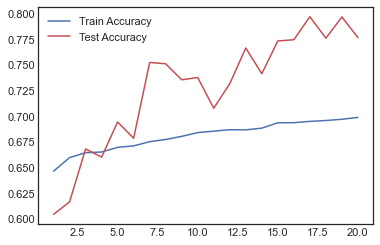

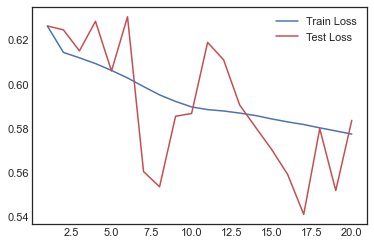

In [41]:
#Plotting the accuracy and loss for train and test (First model developed)
plt.style.use('seaborn-white')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [42]:
# Make predictions on the test set
model1_y_pred = model.predict(X_test_pca)

# Convert the predicted probabilities to binary predictions
model1_y_pred_binary = (model1_y_pred > 0.5).astype(int)

424/424 [==============================] - 1s 1ms/step


Confusion Matrix:
[[9649 2328]
 [ 701  886]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.86     11977
           1       0.28      0.56      0.37      1587

    accuracy                           0.78     13564
   macro avg       0.60      0.68      0.62     13564
weighted avg       0.86      0.78      0.81     13564



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

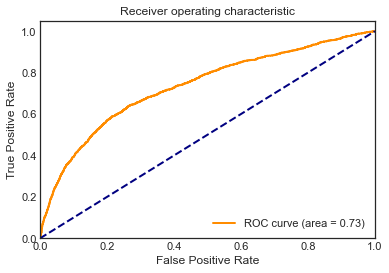

In [43]:
#EVALUATING MODEL 1 PERFORMANCE:

#Confusion matrix
cm = confusion_matrix(y_test, model1_y_pred_binary)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, model1_y_pred_binary)
print("Classification Report:")
print(cr)

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model1_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Model 2 <a class="anchor" id="Model_2"></a>

We built a "SimpleRNN" model i.e., it captures the input sequence and has the ability to perform the task on each input sequence from the memory of previous inputs (Biswal, 2023). Although RNN is used primarily for time series, NLP, or speech recognition tasks, it can still be an applicable model for this case. 

The train and test sets were re-shaped as the model requires a 3-dimensional shape with batch size, time-steps, and input features. We used the ReLU activation function from the default TanH function as ReLU improves computational efficiency and alleviates the vanishing gradient problem. Additionally, the Adam optimizer and binary-cross entropy loss function was used. 

In [44]:
#Re-shaping the data for the RNN input
X_train_pca_reshaped = np.reshape(X_train_pca, (X_train_pca.shape[0], 1, X_train_pca.shape[1]))
X_test_pca_reshaped = np.reshape(X_test_pca, (X_test_pca.shape[0], 1, X_test_pca.shape[1]))

In [45]:
X_train_pca_reshaped.ndim
X_train_pca_reshaped.shape
X_test_pca_reshaped.ndim
X_test_pca_reshaped.shape

3

(55890, 1, 4)

3

(13564, 1, 4)

In [46]:
np.random.seed(1234)
model = Sequential()

# Basic RNN model building
model.add(SimpleRNN(units = 34, input_shape = (1,4), return_sequences=False, activation = "relu")) #used relu as default here is tanh
model.add(Dense(1, activation = "relu"))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 34)                1326      
                                                                 
 dense_2 (Dense)             (None, 1)                 35        
                                                                 
Total params: 1,361
Trainable params: 1,361
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [49]:
history = model.fit(X_train_pca_reshaped, y_train_sm, epochs=20, batch_size=32, validation_data=(X_test_pca_reshaped, y_test))

Epoch 1/20
1747/1747 [==============================] - 5s 2ms/step - loss: 1.2374 - acc: 0.6079 - val_loss: 0.7064 - val_acc: 0.6176
Epoch 2/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.7764 - acc: 0.6321 - val_loss: 0.6846 - val_acc: 0.6607
Epoch 3/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6566 - acc: 0.6493 - val_loss: 0.6740 - val_acc: 0.5938
Epoch 4/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6623 - acc: 0.6529 - val_loss: 0.5903 - val_acc: 0.7144
Epoch 5/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6242 - acc: 0.6622 - val_loss: 0.6311 - val_acc: 0.6649
Epoch 6/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6664 - acc: 0.6579 - val_loss: 0.6426 - val_acc: 0.6691
Epoch 7/20
1747/1747 [==============================] - 4s 2ms/step - loss: 1.1450 - acc: 0.6409 - val_loss: 0.8043 - val_acc: 0.6463
Epoch 8/20
1747/1747 [==============================] - 4s 2ms

<Figure size 432x288 with 0 Axes>

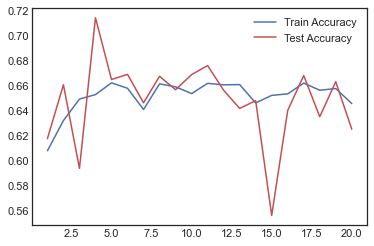

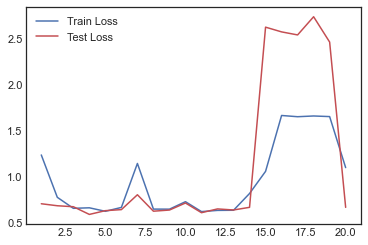

In [50]:
#Plotting the accuracy and loss for train and test (First model developed)
plt.style.use('seaborn-white')
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [51]:
#Making predictions
model2_y_pred = model.predict(X_test_pca_reshaped)
model2_y_pred = (model2_y_pred > 0.5)

424/424 [==============================] - 1s 1ms/step


Confusion Matrix:
[[7446 4531]
 [ 554 1033]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.75     11977
           1       0.19      0.65      0.29      1587

    accuracy                           0.63     13564
   macro avg       0.56      0.64      0.52     13564
weighted avg       0.84      0.63      0.69     13564



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

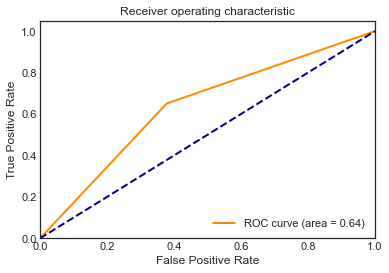

In [52]:
#EVALUATING MODEL 2 PERFORMANCE:

#Confusion matrix
cm = confusion_matrix(y_test, model2_y_pred)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, model2_y_pred)
print("Classification Report:")
print(cr)

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model2_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Note:** The model performance is worse than model 1.

## Model 3 <a class="anchor" id="Model_3"></a>

The LSTM model is a type of RNN model that has a more complex structure than a basic RNN. 

To build a basic LSTM model, We created two layers, each with 100 units, using the ReLU activation function from the default sigmoid and TanH functions. 

The adam optimzer and binary-cross entropy loss functions were used. 

In [53]:
X_train_pca_reshaped_2 = X_train_pca.reshape(X_train_pca.shape[0], 1, X_train_pca.shape[1])
X_test_pca_reshaped_2 = X_test_pca.reshape((X_test_pca.shape[0], 1, X_test_pca.shape[1]))

In [54]:
np.random.seed(1234)

model = Sequential()

# Add two LSTM layer with 100 units and input shape (timesteps, features)
model.add(LSTM(100, input_shape=(1, 4), activation = "relu", return_sequences=True))
model.add(LSTM(100, input_shape=(1, 4), activation = "relu"))
# Add a dense layer with one unit
model.add(Dense(1,activation = "relu"))


In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            42000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 122,501
Trainable params: 122,501
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
history = model.fit(X_train_pca_reshaped_2, y_train_sm, epochs=20, batch_size=32, validation_data=(X_test_pca_reshaped_2, y_test))

Epoch 1/20
1747/1747 [==============================] - 11s 4ms/step - loss: 0.6977 - accuracy: 0.6063 - val_loss: 0.5632 - val_accuracy: 0.7181
Epoch 2/20
1747/1747 [==============================] - 7s 4ms/step - loss: 0.6220 - accuracy: 0.6565 - val_loss: 0.6015 - val_accuracy: 0.7184
Epoch 3/20
1747/1747 [==============================] - 7s 4ms/step - loss: 0.6231 - accuracy: 0.6634 - val_loss: 0.6532 - val_accuracy: 0.6836
Epoch 4/20
1747/1747 [==============================] - 7s 4ms/step - loss: 0.6090 - accuracy: 0.6765 - val_loss: 0.6083 - val_accuracy: 0.7069
Epoch 5/20
1747/1747 [==============================] - 8s 4ms/step - loss: 0.6167 - accuracy: 0.6714 - val_loss: 0.6032 - val_accuracy: 0.7507
Epoch 6/20
1747/1747 [==============================] - 7s 4ms/step - loss: 0.6268 - accuracy: 0.6650 - val_loss: 0.6309 - val_accuracy: 0.6936
Epoch 7/20
1747/1747 [==============================] - 7s 4ms/step - loss: 0.6067 - accuracy: 0.6747 - val_loss: 0.6196 - val_accuracy

<Figure size 432x288 with 0 Axes>

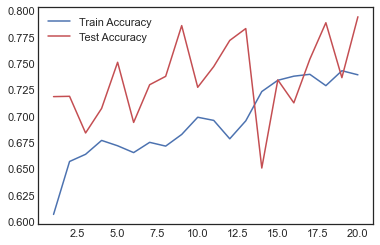

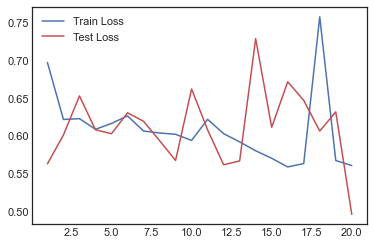

In [58]:
#Plotting the accuracy and loss for train and test
plt.style.use('seaborn-white')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [59]:
model3_y_pred = model.predict(X_test_pca_reshaped_2)
model3_y_pred = (model3_y_pred > 0.5)

424/424 [==============================] - 1s 2ms/step


Confusion Matrix:
[[9846 2131]
 [ 665  922]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88     11977
           1       0.30      0.58      0.40      1587

    accuracy                           0.79     13564
   macro avg       0.62      0.70      0.64     13564
weighted avg       0.86      0.79      0.82     13564



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

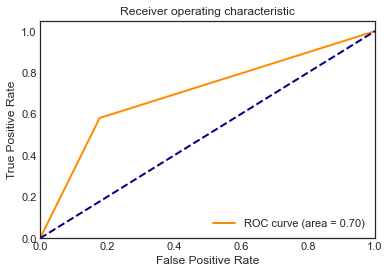

In [60]:
#EVALUATING MODEL 3 PERFORMANCE:

#Confusion matrix
cm = confusion_matrix(y_test, model3_y_pred)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, model3_y_pred)
print("Classification Report:")
print(cr)

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model3_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Model Fine-tuning <a class="anchor" id="Model_Fine-tuning"></a>

We would be fine-tuning model 1 and 3 as these had the best performance from the 3 basic models. 

## Model 1 Fine-tuning <a class="anchor" id="Model_1_Fine-tuning"></a>

#### First fine-tune

We added an additional hidden layer with 32 neurons and specified the output layer with a ReLU activation function. Further, we adjusted the number of epochs to 20.

In [61]:
model = Sequential()

#Hidden layers
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

#Output layers
model.add(Dense(1,activation = 'relu')) 

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [62]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           4
               Dense   XXXXX -------------------       160     6.9%
                relu   #####          32
               Dense   XXXXX -------------------      1056    45.8%
                relu   #####          32
               Dense   XXXXX -------------------      1056    45.8%
                relu   #####          32
               Dense   XXXXX -------------------        33     1.4%
                relu   #####           1


In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(X_train_pca, y_train_sm, epochs=20, batch_size=16, validation_data=(X_test_pca, y_test))

Epoch 1/20
3494/3494 [==============================] - 7s 2ms/step - loss: 0.7932 - accuracy: 0.6399 - val_loss: 0.6079 - val_accuracy: 0.7597
Epoch 2/20
3494/3494 [==============================] - 6s 2ms/step - loss: 0.6402 - accuracy: 0.6626 - val_loss: 0.6412 - val_accuracy: 0.7233
Epoch 3/20
3494/3494 [==============================] - 7s 2ms/step - loss: 0.6073 - accuracy: 0.6772 - val_loss: 0.5819 - val_accuracy: 0.7434
Epoch 4/20
3494/3494 [==============================] - 6s 2ms/step - loss: 0.5934 - accuracy: 0.6861 - val_loss: 0.5971 - val_accuracy: 0.7701
Epoch 5/20
3494/3494 [==============================] - 7s 2ms/step - loss: 0.5860 - accuracy: 0.6954 - val_loss: 0.5538 - val_accuracy: 0.7740
Epoch 6/20
3494/3494 [==============================] - 7s 2ms/step - loss: 0.5532 - accuracy: 0.7300 - val_loss: 0.7047 - val_accuracy: 0.6744
Epoch 7/20
3494/3494 [==============================] - 7s 2ms/step - loss: 0.5462 - accuracy: 0.7350 - val_loss: 0.6684 - val_accuracy:

<Figure size 432x288 with 0 Axes>

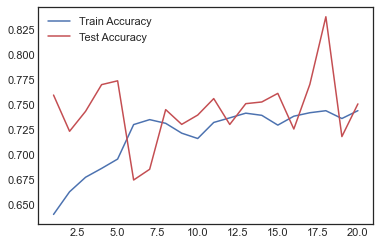

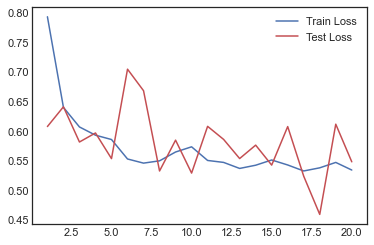

In [65]:
#Plotting the accuracy and loss for train and test (First model developed)
plt.style.use('seaborn-white')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [66]:
# Make predictions on the test set
model1_y_pred_tuned = model.predict(X_test_pca)

# Convert the predicted probabilities to binary predictions
model1_y_pred_binary_tuned = (model1_y_pred_tuned > 0.5).astype(int)

424/424 [==============================] - 1s 1ms/step


Confusion Matrix:
[[9101 2876]
 [ 504 1083]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.84     11977
           1       0.27      0.68      0.39      1587

    accuracy                           0.75     13564
   macro avg       0.61      0.72      0.62     13564
weighted avg       0.87      0.75      0.79     13564



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

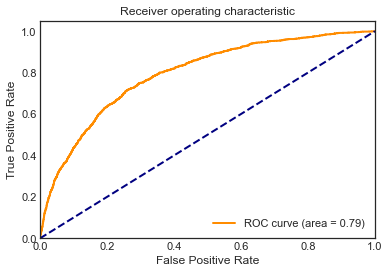

In [67]:
#EVALUATING MODEL 1 PERFORMANCE TUNED:

#Confusion matrix
cm = confusion_matrix(y_test, model1_y_pred_binary_tuned)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, model1_y_pred_binary_tuned)
print("Classification Report:")
print(cr)

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model1_y_pred_tuned)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Second fine tune

We kept the previous changes made but added a drop-out rate of 0.2 and changed the batch size from 16 to 32. Including and adjusting the drop-out rate is a regularization technique that prevents overfitting and forces the neurons to learn more robust features. It is the probability that a neuron will be dropped from the network during training (Yadav, 2022).

In [68]:
model = Sequential()

#Hidden layers
model.add(Dense(32, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))

#Including a dropout rate
model.add(Dropout(rate=0.2))

#Output layers
model.add(Dense(1,activation = 'relu')) 

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                160       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [69]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           4
               Dense   XXXXX -------------------       160     6.9%
                relu   #####          32
               Dense   XXXXX -------------------      1056    45.8%
                relu   #####          32
               Dense   XXXXX -------------------      1056    45.8%
                relu   #####          32
             Dropout    | || -------------------         0     0.0%
                       #####          32
               Dense   XXXXX -------------------        33     1.4%
                relu   #####           1


In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [71]:
history = model.fit(X_train_pca, y_train_sm, epochs=20, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/20
1747/1747 [==============================] - 5s 2ms/step - loss: 0.8552 - accuracy: 0.6235 - val_loss: 0.5829 - val_accuracy: 0.7241
Epoch 2/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6557 - accuracy: 0.6513 - val_loss: 0.5978 - val_accuracy: 0.7612
Epoch 3/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6341 - accuracy: 0.6639 - val_loss: 0.6076 - val_accuracy: 0.7545
Epoch 4/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6159 - accuracy: 0.6726 - val_loss: 0.6236 - val_accuracy: 0.7133
Epoch 5/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6251 - accuracy: 0.6610 - val_loss: 0.5745 - val_accuracy: 0.7935
Epoch 6/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6146 - accuracy: 0.6686 - val_loss: 0.6076 - val_accuracy: 0.7311
Epoch 7/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6055 - accuracy: 0.6782 - val_loss: 0.5275 - val_accuracy:

<Figure size 432x288 with 0 Axes>

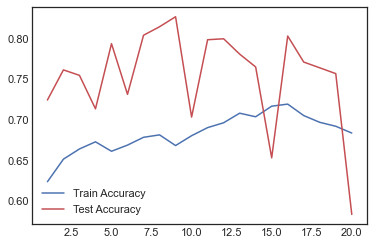

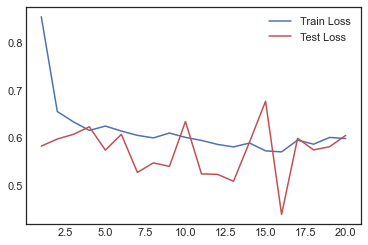

In [72]:
#Plotting the accuracy and loss for train and test (First model developed)
plt.style.use('seaborn-white')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [73]:
# Make predictions on the test set
model1_y_pred_tuned = model.predict(X_test_pca)

# Convert the predicted probabilities to binary predictions
model1_y_pred_binary_tuned = (model1_y_pred_tuned > 0.5).astype(int)

424/424 [==============================] - 1s 1ms/step


Confusion Matrix:
[[6876 5101]
 [ 552 1035]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.57      0.71     11977
           1       0.17      0.65      0.27      1587

    accuracy                           0.58     13564
   macro avg       0.55      0.61      0.49     13564
weighted avg       0.84      0.58      0.66     13564



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

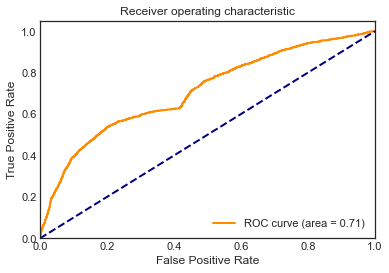

In [74]:
#EVALUATING MODEL 1 PERFORMANCE:

#Confusion matrix
cm = confusion_matrix(y_test, model1_y_pred_binary_tuned)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, model1_y_pred_binary_tuned)
print("Classification Report:")
print(cr)

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model1_y_pred_tuned)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Third fine tune

We included an additional hidden layer and changed the number of neurons to 64. Furthermore, through several iterations, we adjusted the learning rate for the adam optimizer to be 0.002 from the default 0.001. Learning rate if a hyperparameter tuning mechanism that controls the step size taken during gradient descent optimization (Pramoditha, 2022).

In [75]:
model = Sequential()

#Hidden layers
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

#Including a dropout rate
model.add(Dropout(rate=0.2))

#Output layers
model.add(Dense(1,activation = 'relu')) 

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,865
Trainable params: 12,865
Non-trai

In [76]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####           4
               Dense   XXXXX -------------------       320     2.5%
                relu   #####          64
               Dense   XXXXX -------------------      4160    32.3%
                relu   #####          64
               Dense   XXXXX -------------------      4160    32.3%
                relu   #####          64
               Dense   XXXXX -------------------      4160    32.3%
                relu   #####          64
             Dropout    | || -------------------         0     0.0%
                       #####          64
               Dense   XXXXX -------------------        65     0.5%
                relu   #####           1


In [77]:
optimizer = keras.optimizers.Adam(learning_rate=0.002)

In [78]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
history = model.fit(X_train_pca, y_train_sm, epochs=20, batch_size=32, validation_data=(X_test_pca, y_test))

Epoch 1/20
1747/1747 [==============================] - 6s 3ms/step - loss: 0.7501 - accuracy: 0.6107 - val_loss: 0.7585 - val_accuracy: 0.6157
Epoch 2/20
1747/1747 [==============================] - 5s 3ms/step - loss: 0.6390 - accuracy: 0.6514 - val_loss: 0.6468 - val_accuracy: 0.6561
Epoch 3/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6388 - accuracy: 0.6530 - val_loss: 0.6147 - val_accuracy: 0.6674
Epoch 4/20
1747/1747 [==============================] - 5s 3ms/step - loss: 0.6433 - accuracy: 0.6385 - val_loss: 0.6147 - val_accuracy: 0.6747
Epoch 5/20
1747/1747 [==============================] - 5s 3ms/step - loss: 0.6251 - accuracy: 0.6629 - val_loss: 0.6413 - val_accuracy: 0.6790
Epoch 6/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6300 - accuracy: 0.6533 - val_loss: 0.5980 - val_accuracy: 0.8006
Epoch 7/20
1747/1747 [==============================] - 4s 2ms/step - loss: 0.6145 - accuracy: 0.6695 - val_loss: 0.5722 - val_accuracy:

<Figure size 432x288 with 0 Axes>

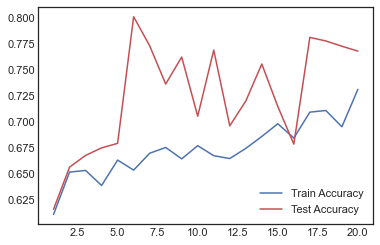

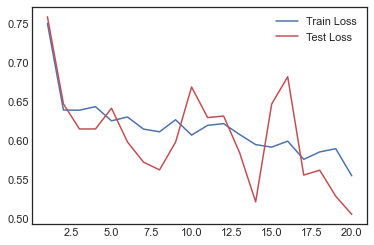

In [80]:
#Plotting the accuracy and loss for train and test (First model developed)
plt.style.use('seaborn-white')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [81]:
# Make predictions on the test set
model1_y_pred_tuned = model.predict(X_test_pca)

# Convert the predicted probabilities to binary predictions
model1_y_pred_binary_tuned = (model1_y_pred_tuned > 0.5).astype(int)

424/424 [==============================] - 1s 1ms/step


Confusion Matrix:
[[9391 2586]
 [ 566 1021]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.78      0.86     11977
           1       0.28      0.64      0.39      1587

    accuracy                           0.77     13564
   macro avg       0.61      0.71      0.62     13564
weighted avg       0.87      0.77      0.80     13564



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

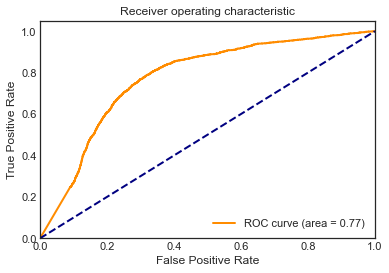

In [82]:
#EVALUATING MODEL 1 PERFORMANCE:

#Confusion matrix
cm = confusion_matrix(y_test, model1_y_pred_binary_tuned)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, model1_y_pred_binary_tuned)
print("Classification Report:")
print(cr)

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model1_y_pred_tuned)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Overall**, the third fine-tuning step provided us with the most optimal solution for model 1.

## Model 3 Fine-tuning <a class="anchor" id="Model_3_Fine-tuning"></a>

#### First fine tune

The initial number of units in the base LSTM model was 100 and we increased it to 128. Additionally, we changed the activation function for the output layer from ReLU to Sigmoid as this showed better performance.

In [83]:
X_train_pca_reshaped_2 = X_train_pca.reshape(X_train_pca.shape[0], 1, X_train_pca.shape[1])
X_test_pca_reshaped_2 = X_test_pca.reshape((X_test_pca.shape[0], 1, X_test_pca.shape[1]))

In [84]:
np.random.seed(1234)

model = Sequential()

# Add two LSTM layer with 100 units and input shape (timesteps, features)
model.add(LSTM(128, input_shape=(1, 4), activation = "relu", return_sequences=True))
model.add(LSTM(128, input_shape=(1, 4), activation = "relu"))

# Add a dense layer with one unit
model.add(Dense(1,activation = "sigmoid"))


In [85]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 128)            68096     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 199,809
Trainable params: 199,809
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
history = model.fit(X_train_pca_reshaped_2, y_train_sm, epochs=20, batch_size=32, validation_data=(X_test_pca_reshaped_2, y_test))

Epoch 1/20
1747/1747 [==============================] - 12s 5ms/step - loss: 0.6135 - accuracy: 0.6627 - val_loss: 0.5766 - val_accuracy: 0.7593
Epoch 2/20
1747/1747 [==============================] - 9s 5ms/step - loss: 0.5912 - accuracy: 0.6844 - val_loss: 0.5656 - val_accuracy: 0.7693
Epoch 3/20
1747/1747 [==============================] - 9s 5ms/step - loss: 0.5812 - accuracy: 0.6952 - val_loss: 0.5372 - val_accuracy: 0.8002
Epoch 4/20
1747/1747 [==============================] - 9s 5ms/step - loss: 0.5656 - accuracy: 0.7173 - val_loss: 0.5352 - val_accuracy: 0.7791
Epoch 5/20
1747/1747 [==============================] - 9s 5ms/step - loss: 0.5528 - accuracy: 0.7255 - val_loss: 0.5786 - val_accuracy: 0.7668
Epoch 6/20
1747/1747 [==============================] - 9s 5ms/step - loss: 0.5457 - accuracy: 0.7284 - val_loss: 0.5640 - val_accuracy: 0.7604
Epoch 7/20
1747/1747 [==============================] - 9s 5ms/step - loss: 0.5413 - accuracy: 0.7329 - val_loss: 0.5891 - val_accuracy

<Figure size 432x288 with 0 Axes>

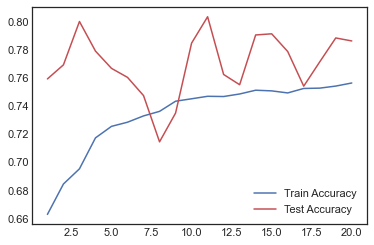

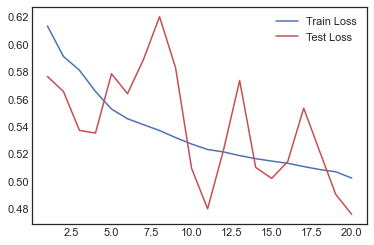

In [88]:
#Plotting the accuracy and loss for train and test 
plt.style.use('seaborn-white')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [89]:
model3_y_pred = model.predict(X_test_pca_reshaped_2)
model3_y_pred = (model3_y_pred > 0.5)

424/424 [==============================] - 1s 2ms/step


Confusion Matrix:
[[9660 2317]
 [ 581 1006]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     11977
           1       0.30      0.63      0.41      1587

    accuracy                           0.79     13564
   macro avg       0.62      0.72      0.64     13564
weighted avg       0.87      0.79      0.82     13564



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

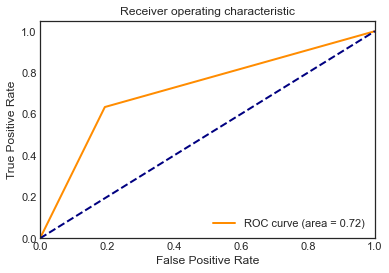

In [90]:
#EVALUATING MODEL 3 PERFORMANCE:

#Confusion matrix
cm = confusion_matrix(y_test, model3_y_pred)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, model3_y_pred)
print("Classification Report:")
print(cr)

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model3_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Second fine tune

We further increased the units from 128 to 140. Additionally, we included a dropout rate with the probability of 0.2 for each hidden layer. 

We evaluated early stopping regularization i.e., stopping the training process early if the model performance doesn't improve after a certain number of epochs. The epochs were set to 100, and early stopping was included, however, it didn't work and was dropped. 

In [91]:
X_train_pca_reshaped_2 = X_train_pca.reshape(X_train_pca.shape[0], 1, X_train_pca.shape[1])
X_test_pca_reshaped_2 = X_test_pca.reshape((X_test_pca.shape[0], 1, X_test_pca.shape[1]))

In [92]:
np.random.seed(1234)

model = Sequential()

# Add two LSTM layer with 100 units and input shape (timesteps, features)
model.add(LSTM(140, input_shape=(1, 4), activation = "relu", return_sequences=True))
model.add(Dropout(0.2)) #added a dropout layer with probability 0.2 at each layer
model.add(LSTM(140, input_shape=(1, 4), activation = "relu"))
model.add(Dropout(0.2))
# Add a dense layer with one unit
model.add(Dense(1,activation = "sigmoid"))


In [93]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 140)            81200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 140)            0         
                                                                 
 lstm_5 (LSTM)               (None, 140)               157360    
                                                                 
 dropout_3 (Dropout)         (None, 140)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                 141       
                                                                 
Total params: 238,701
Trainable params: 238,701
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
history = model.fit(X_train_pca_reshaped_2, y_train_sm, epochs=20, batch_size=32, validation_data=(X_test_pca_reshaped_2, y_test))

Epoch 1/20
1747/1747 [==============================] - 13s 6ms/step - loss: 0.6166 - accuracy: 0.6579 - val_loss: 0.6350 - val_accuracy: 0.6818
Epoch 2/20
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5955 - accuracy: 0.6786 - val_loss: 0.5759 - val_accuracy: 0.7901
Epoch 3/20
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5889 - accuracy: 0.6855 - val_loss: 0.5876 - val_accuracy: 0.7923
Epoch 4/20
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5837 - accuracy: 0.6933 - val_loss: 0.5689 - val_accuracy: 0.7736
Epoch 5/20
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5766 - accuracy: 0.7049 - val_loss: 0.6249 - val_accuracy: 0.7151
Epoch 6/20
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5650 - accuracy: 0.7188 - val_loss: 0.5712 - val_accuracy: 0.7793
Epoch 7/20
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5567 - accuracy: 0.7239 - val_loss: 0.5601 - val_ac

<Figure size 432x288 with 0 Axes>

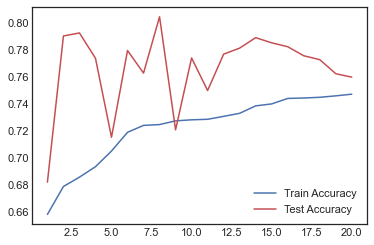

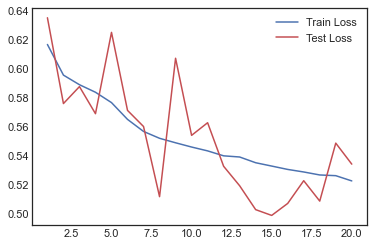

In [96]:
#Plotting the accuracy and loss for train and test 
plt.style.use('seaborn-white')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [97]:
model3_y_pred = model.predict(X_test_pca_reshaped_2)
model3_y_pred = (model3_y_pred > 0.5)

424/424 [==============================] - 1s 2ms/step


Confusion Matrix:
[[9218 2759]
 [ 502 1085]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85     11977
           1       0.28      0.68      0.40      1587

    accuracy                           0.76     13564
   macro avg       0.62      0.73      0.62     13564
weighted avg       0.87      0.76      0.80     13564



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

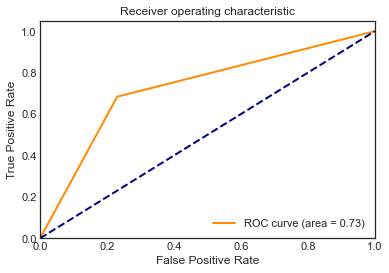

In [98]:
#EVALUATING MODEL 3 PERFORMANCE:

#Confusion matrix
cm = confusion_matrix(y_test, model3_y_pred)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, model3_y_pred)
print("Classification Report:")
print(cr)

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model3_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Third fine tune

The final fine-tuning method included a learning rate of 0.003 after several trial and errors for the adam optimizer. Additionally, epochs were also increased to 30.

In [99]:
X_train_pca_reshaped_2 = X_train_pca.reshape(X_train_pca.shape[0], 1, X_train_pca.shape[1])
X_test_pca_reshaped_2 = X_test_pca.reshape((X_test_pca.shape[0], 1, X_test_pca.shape[1]))

In [100]:
np.random.seed(1234)

model = Sequential()

# Add two LSTM layer with 100 units and input shape (timesteps, features)
model.add(LSTM(140, input_shape=(1, 4), activation = "relu", return_sequences=True))
model.add(Dropout(0.2)) #added a dropout layer with probability 0.2 at each layer
model.add(LSTM(140, input_shape=(1, 4), activation = "relu"))
model.add(Dropout(0.2))
# Add a dense layer with one unit
model.add(Dense(1,activation = "sigmoid"))


In [101]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 140)            81200     
                                                                 
 dropout_4 (Dropout)         (None, 1, 140)            0         
                                                                 
 lstm_7 (LSTM)               (None, 140)               157360    
                                                                 
 dropout_5 (Dropout)         (None, 140)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                 141       
                                                                 
Total params: 238,701
Trainable params: 238,701
Non-trainable params: 0
_________________________________________________________________


In [102]:
optimizer = keras.optimizers.Adam(learning_rate=0.003)

In [103]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [104]:
history = model.fit(X_train_pca_reshaped_2, y_train_sm, epochs=30, batch_size=32, validation_data=(X_test_pca_reshaped_2, y_test))

Epoch 1/30
1747/1747 [==============================] - 16s 7ms/step - loss: 0.6098 - accuracy: 0.6652 - val_loss: 0.6254 - val_accuracy: 0.7750
Epoch 2/30
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5924 - accuracy: 0.6807 - val_loss: 0.5846 - val_accuracy: 0.8095
Epoch 3/30
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5823 - accuracy: 0.6998 - val_loss: 0.5625 - val_accuracy: 0.7720
Epoch 4/30
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5661 - accuracy: 0.7164 - val_loss: 0.6150 - val_accuracy: 0.7123
Epoch 5/30
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5596 - accuracy: 0.7209 - val_loss: 0.5297 - val_accuracy: 0.7924
Epoch 6/30
1747/1747 [==============================] - 10s 6ms/step - loss: 0.5565 - accuracy: 0.7239 - val_loss: 0.5562 - val_accuracy: 0.7679
Epoch 7/30
1747/1747 [==============================] - 11s 6ms/step - loss: 0.5522 - accuracy: 0.7240 - val_loss: 0.4852 - val_ac

<Figure size 432x288 with 0 Axes>

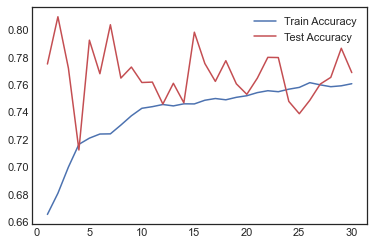

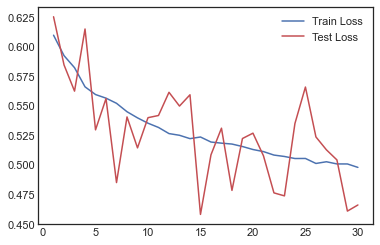

In [105]:
#Plotting the accuracy and loss for train and test
plt.style.use('seaborn-white')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label = "Train Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label = "Train Loss")
plt.plot(epochs, val_loss, 'r', label = "Test Loss")
plt.legend()
plt.show()

In [106]:
model3_y_pred = model.predict(X_test_pca_reshaped_2)
model3_y_pred = (model3_y_pred > 0.5)

424/424 [==============================] - 1s 2ms/step


Confusion Matrix:
[[9304 2673]
 [ 464 1123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     11977
           1       0.30      0.71      0.42      1587

    accuracy                           0.77     13564
   macro avg       0.62      0.74      0.64     13564
weighted avg       0.88      0.77      0.80     13564



<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

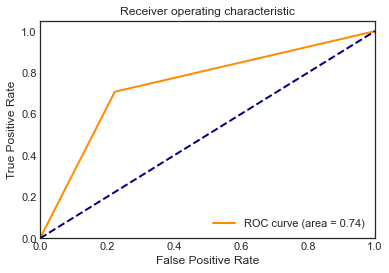

In [107]:
#EVALUATING MODEL 3 PERFORMANCE:

#Confusion matrix
cm = confusion_matrix(y_test, model3_y_pred)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, model3_y_pred)
print("Classification Report:")
print(cr)

#ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model3_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Model evaluation <a class="anchor" id="Model_evaluation"></a>

From the above models the following were shortlisted for performing well and will be evaluated in detail:

- Basic Model 1
- Model 3: First Fine Tune

The evaluation metrics we used for all models are:
- **The confusion matrix:** This is a table used to evaluate the performance of a classification model. It includes a number for "True Positive" (TP), "False Positive" (FP), "True Negative" (TN), "False Negative" (FN). 


- **The Classification Report:** It summarizes the precision (proportion of true positive predictions among all positive predictions), recall (proportion of true positive predictions among all actual positive predictions), F1-score (mean of the precision and recall), and support for each class. 


- **Receiver Operating Characteristic (ROC) curve:** a graph that shows the trade-off between the True Positive Rate and the False Positive Rate for a binary classifier. If the metric is close to 1, it indicates a perfect classifier, and if it is at 0.5 the classifier is no better than random. 

### Basic Model 1 evaluation

- **Confusion matrix:** the model made 9,649 true negative predictions, 2,328 false positive predictions, 701 false negative predictions and 866 true positive predictions. The model incorrectly predicted 2,328 non-defaults as defaults and 701 defaults as non-defaults.


- **Classification report:** we take the weighted average of precision, recall, and F1-score from the report which takes into account the imbalance of the samples in each class. The precision is 0.86, the weighted average recall is 0.78, and the average F1-score is 0.81. 


- **ROC Curve:** the model indicates moderate predicitive power with a probability of 0.73.

**The overall accuracy of the model is 0.78, and the results indicate that the model can predict the negative class more accurately than the positive class.**

### Model 3: First Fine Tune evaluation

- **Confusion matrix:** the model made 9,660 true negative predictions, 2,317 false positive predictions, 581 false negative predictions and 1,006 true positive predictions. The model incorrectly predicted 2,317 non-defaults as defaults and 581 defaults as non-defaults.


- **Classification report:** we take the weighted average of precision, recall, and F1-score from the report which takes into account the imbalance of the samples in each class. The precision is 0.87, the weighted average recall is 0.79, and the average F1-score is 0.82. 


- **ROC Curve:** the model indicates moderate predicitive power with a probability of 0.72.

**The overall accuracy of the model is 0.79, and the results indicate that the model can predict the negative class more accurately than the positive class.**

### Overall results:

Given the two models, "Model 3 first fine tune" performs slightly better than "Basic model 1". However, we cannot ignore the fact that both of the models struggle at correctly identifying positive instances despite the efforts to fix the class imbalance issue prior to running the model. 

Therefore, out of all the models tested, the **LSTM model with fine-tuning methods 1** proved to be the best performing model after tuning the hyperparameters to improve performance. 

This model would be deployed to make predictions for targeted marketing for the Portugese Banking institution for clients to subscribe to their term deposits. 

# Conclusion <a class="anchor" id="Conclusion"></a>

Overall, in this project we explored the Bank Marketing dataset from the UCI machine learning repository and built three different types of models to predict whether a customer will subscribe to a term deposit or not. We trained and evaluated a two layer MLP, SimpleRNN, and LSTM model on this dataset with pre-processing steps such as normalisation and PCA. Based on the evaluation results, we found that the LSTM model outperformed the other two models in terms of accuracy, precision, recall, and F1-score.

Our analysis showed that some of the most important features in predicting term deposit subscription were age, job, and if they had a personal or housing loan. 

Overall, the LSTM model provides an optimal solution for predicting term deposit subscription for banks. The analysis can be used to optimize marketing strategies and improve the bank's customer engagement. Further research could be conducted to explore other modeling techniques and additional features that may improve the accuracy of the predictions.







# Bibliography <a class="anchor" id="Bibliography"></a>

Biswal, A. (2023). Recurrent Neural Network (RNN) Tutorial: Types and Examples [Updated] | Simplilearn. [online] Simplilearn.com. Available at: https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn#what_is_a_recurrent_neural_network_rnn.

Brownlee, J. (2017). Gentle Introduction to the Adam Optimization Algorithm for Deep Learning. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20a%20replacement%20optimization.

Hardesty, L. (2017). Explained: Neural networks. [online] MIT News. Available at: https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414. 

Jaadi, Z. (2019). A Step by Step Explanation of Principal Component Analysis. [online] Built In. Available at: https://builtin.com/data-science/step-step-explanation-principal-component-analysis.

Korstanje, J. (2021). SMOTE. [online] Medium. Available at: https://towardsdatascience.com/smote-fdce2f605729.

Kostadinov, S. (2019). Understanding Backpropagation Algorithm. [online] Medium. Available at: https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd.

Marimuthu, P. (2022). How Activation Functions Work in Deep Learning. [online] KDnuggets. Available at: https://www.kdnuggets.com/2022/06/activation-functions-work-deep-learning.html.

Moro, S., Cortez, P. and Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, pp.22–31.

Pramoditha, R. (2022). How to Choose the Optimal Learning Rate for Neural Networks. [online] Medium. Available at: https://towardsdatascience.com/how-to-choose-the-optimal-learning-rate-for-neural-networks-362111c5c783#:~:text=The%20learning%20rate%20is%20the.

Roberts, A. (2023). Binary Cross Entropy: Where To Use Log Loss In Model Monitoring. [online] Arize AI. Available at: https://arize.com/blog-course/binary-cross-entropy-log-loss/.

UCI Machine Learning Repository (2012). UCI Machine Learning Repository: Bank Marketing Data Set. [online] Uci.edu. Available at: https://archive.ics.uci.edu/ml/datasets/bank+marketing.

Yadav, H. (2022). Dropout in Neural Networks. [online] Medium. Available at: https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9.